# Examples for cmip6 decadal

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import operators as ops

## Run subset

In [3]:
wf = ops.Subset(
        ops.Input(
                'tas', ['CMIP6.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r1i1p1f2.Amon.tas.gn.v20200417']
        ),
        time="1995-01-01/1995-12-31",
)

resp = wf.orchestrate()
resp.ok

True

**open with xarray**

In [4]:
dsets = resp.datasets()

In [5]:
ds = dsets[0]
ds

<xarray.Dataset>
Dimensions:    (time: 2, bnds: 2, lat: 324, lon: 432)
Coordinates:
  * time       (time) object 1995-11-16 00:00:00 1995-12-16 00:00:00
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-05-26T09:30:20Z
    ...                     ...
    tracking_id:            hdl:21.14100/96ad0d23-a8bc-42f4-b3e7-3dd5287f48e1
    variable_id:            tas
    variable_name:          tas
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by Met Office Hadley Ce...
    cmor_version:           3.4.0

**provenance**

In [6]:
prov_plot_url = resp.provenance_image()
prov_plot_url

'http://rook4.cloud.dkrz.de:80/outputs/rook/0255a336-f180-11ec-a4dd-fa163ed6c06f/provenance.png'

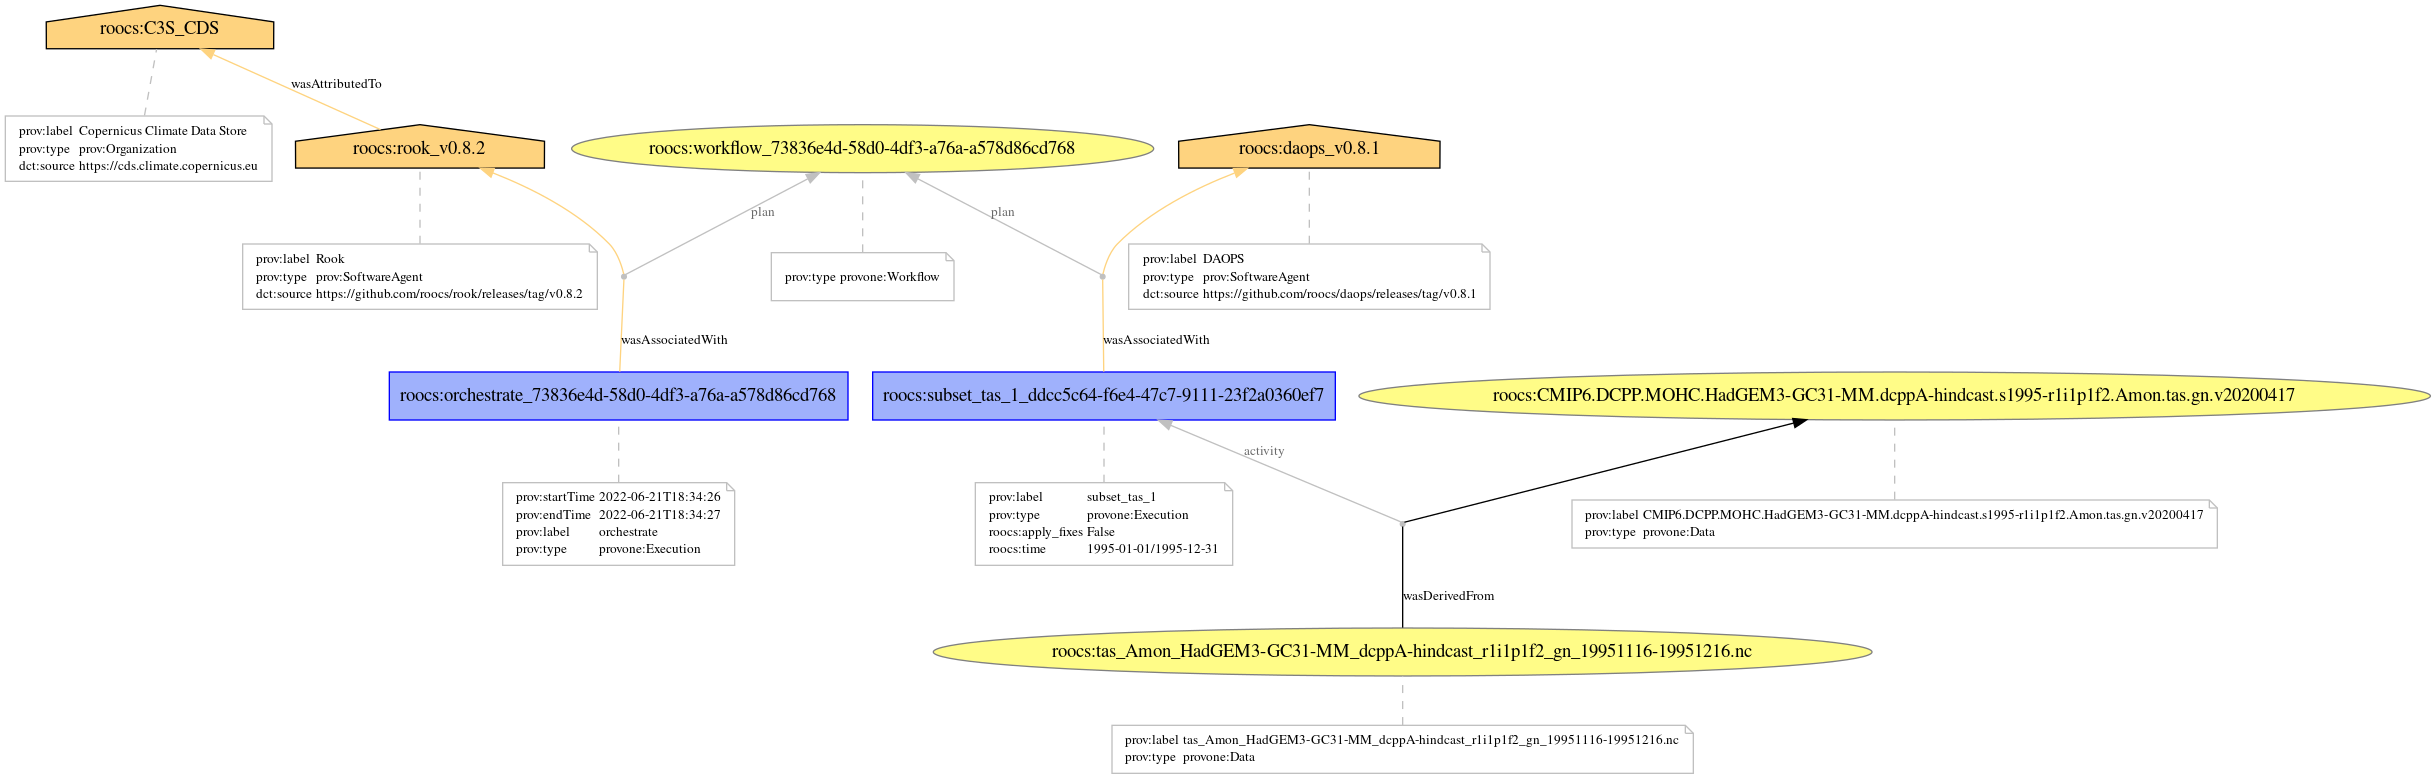

In [7]:
from IPython.display import Image
Image(prov_plot_url)